In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from beam_moments import *

In [2]:
df_tracker = get_df_tracker()
df_tracker.head()

,radial,vertical,counts,Station
index,,,,
2,-59.0,-59.0,0.0,station12
3,-59.0,-57.0,0.0,station12
4,-59.0,-55.0,0.0,station12
5,-59.0,-53.0,0.0,station12
6,-59.0,-51.0,0.0,station12


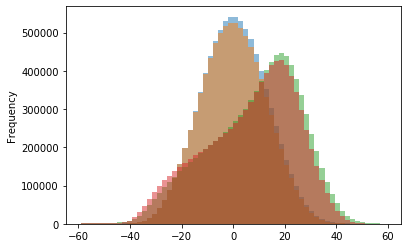

In [3]:
mask1 = df_tracker["Station"] == 'station12'
mask2 = df_tracker["Station"] == 'station18'
(df_tracker[mask2])["vertical"].plot(kind="hist",weights=(df_tracker[mask2])['counts'],bins=60,alpha=0.5)
(df_tracker[mask1])["vertical"].plot(kind="hist",weights=(df_tracker[mask1])['counts'],bins=60,alpha=0.5)
(df_tracker[mask2])["radial"].plot(kind="hist",weights=(df_tracker[mask2])['counts'],bins=60,alpha=0.5)
(df_tracker[mask1])["radial"].plot(kind="hist",weights=(df_tracker[mask1])['counts'],bins=60,alpha=0.5)

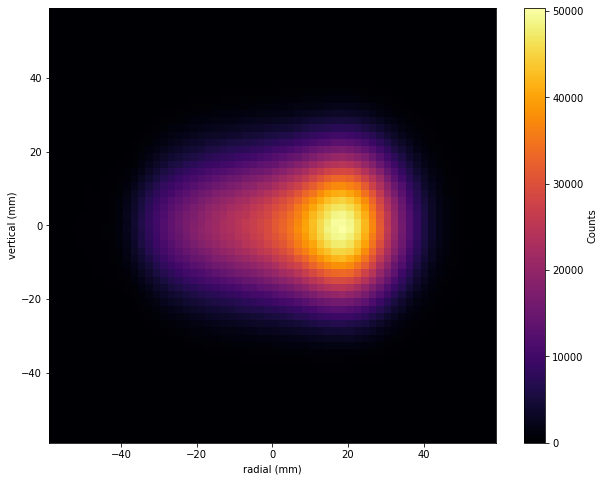

In [4]:
plot_beam(df_tracker)

In [5]:
w = df_tracker['counts']
v = df_tracker['vertical']
r = df_tracker['radial']
m_2 = get_mean(r,w) #the radial mean
m_3 = get_mean(v,w) #the vertical mean
em_2 = get_rms(r,m_2,w) #the radial rms
em_3 = get_rms(v,m_3,w) #the vertical rms

## To correct and account for various beam dynamical effects, we need to transform the tracker data.

In [6]:
from transform_beam import shift_beam

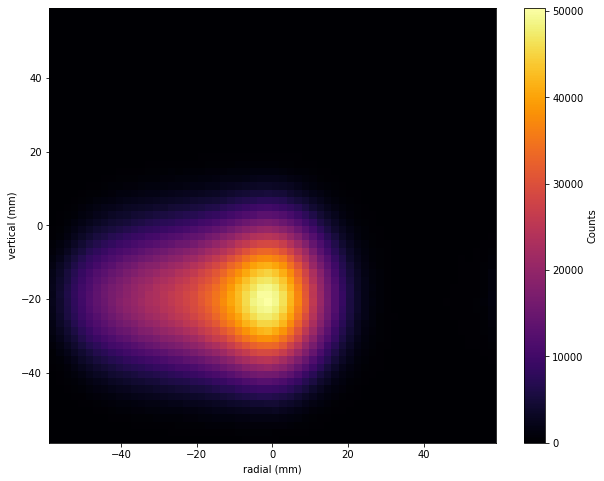

In [7]:
xshift = -20
yshift = -20
df_shift = shift_beam(df_tracker,xshift,yshift)
plot_beam(df_shift)

In [8]:
df_tracker

,radial,vertical,counts,Station
index,,,,
2,-59.0,-59.0,0.0,station12
3,-59.0,-57.0,0.0,station12
4,-59.0,-55.0,0.0,station12
5,-59.0,-53.0,0.0,station12
6,-59.0,-51.0,0.0,station12
7,-59.0,-49.0,16.0,station12
8,-59.0,-47.0,10.0,station12
9,-59.0,-45.0,2.0,station12
10,-59.0,-43.0,6.0,station12


In [9]:
df_shift



,radial,vertical,counts,Station
index,,,,
612,-59.0,-59.0,8.0,station12
4214,-59.0,-59.0,21.0,station18
613,-59.0,-57.0,9.0,station12
4215,-59.0,-57.0,17.0,station18
614,-59.0,-55.0,4.0,station12
4216,-59.0,-55.0,17.0,station18
615,-59.0,-53.0,7.0,station12
4217,-59.0,-53.0,18.0,station18
616,-59.0,-51.0,13.0,station12
